## Analysis

In [5]:
pip install pyspark

In [6]:
import ast
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col, to_date
from pyspark.sql.types import ArrayType, StringType

In [12]:
spark = SparkSession.builder \
    .appName("Keyword Trends Analysis") \
    .getOrCreate()

df = spark.read.csv("/content/data.csv", header=True, inferSchema=True)


df.printSchema()

# Afficher les premières lignes du DataFrame
df.show()

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Application Number: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Abstract: string (nullable = true)
 |-- Applicants: string (nullable = true)
 |-- Inventors: string (nullable = true)
 |-- Publication_Date: string (nullable = true)
 |-- PDF_Link: string (nullable = true)
 |-- Ressource: string (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Pays: string (nullable = true)
 |-- assignee: string (nullable = true)

+---+---+------------------+--------------------+--------------------+-------------------------+------------------+----------------+--------------------+---------+--------------------+-----------+---------------------------------+
|_c0| id|Application Number|               Title|            Abstract|               Applicants|         Inventors|Publication_Date|            PDF_Link|Ressource|                Tags|       Pays|                         assignee|
+---+---+-

In [11]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("/content/data.csv")
df.show()
# Drop the specified columns
df = df.drop(columns=['_c0', '_id'])

# Add a new 'id' column that starts from 1
df.insert(0, 'id', range(1, len(df) + 1))

# Display the first few rows to confirm
print(df.head())

# Save the modified DataFrame to a new CSV file if needed
df.to_csv("/content/data_cleaned.csv", index=False)


AttributeError: 'DataFrame' object has no attribute 'show'

In [13]:
spark = SparkSession.builder \
    .appName("Keyword Trends Analysis") \
    .getOrCreate()

df = spark.read.csv("/content/data.csv", header=True, inferSchema=True)


df.printSchema()

# Afficher les premières lignes du DataFrame
df.show()

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Application Number: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Abstract: string (nullable = true)
 |-- Applicants: string (nullable = true)
 |-- Inventors: string (nullable = true)
 |-- Publication_Date: string (nullable = true)
 |-- PDF_Link: string (nullable = true)
 |-- Ressource: string (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Pays: string (nullable = true)
 |-- assignee: string (nullable = true)

+---+---+------------------+--------------------+--------------------+-------------------------+------------------+----------------+--------------------+---------+--------------------+-----------+---------------------------------+
|_c0| id|Application Number|               Title|            Abstract|               Applicants|         Inventors|Publication_Date|            PDF_Link|Ressource|                Tags|       Pays|                         assignee|
+---+---+-


# **Initialisation de PySpark**

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, year

# Créer une session Spark
spark = SparkSession.builder \
    .appName("Patent Analysis") \
    .getOrCreate()

# Charger le fichier CSV dans un DataFrame Spark
df = spark.read.csv("/content/data.csv", header=True, inferSchema=True)

# Afficher le schéma du DataFrame
df.printSchema()

# Afficher les premières lignes du DataFrame
df.show()


root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Application Number: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Abstract: string (nullable = true)
 |-- Applicants: string (nullable = true)
 |-- Inventors: string (nullable = true)
 |-- Publication_Date: string (nullable = true)
 |-- PDF_Link: string (nullable = true)
 |-- Ressource: string (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Pays: string (nullable = true)
 |-- assignee: string (nullable = true)

+---+---+------------------+--------------------+--------------------+-------------------------+------------------+----------------+--------------------+---------+--------------------+-----------+---------------------------------+
|_c0| id|Application Number|               Title|            Abstract|               Applicants|         Inventors|Publication_Date|            PDF_Link|Ressource|                Tags|       Pays|                         assignee|
+---+---+-


# **Vérifier les valeurs nulles dans la colonne Publication_Date**

In [20]:
# Compter le nombre de valeurs nulles dans la colonne 'Publication_Date'
null_count = df.filter(col("Publication_Date").isNull()).count()
print(f"Nombre de valeurs nulles dans 'Publication_Date': {null_count}")

# Afficher les lignes où 'Publication_Date' est nulle
df.filter(col("Publication_Date").isNull()).show()


Nombre de valeurs nulles dans 'Publication_Date': 99
+----+----+------------------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+----------+--------------------+------------+-----------------------------------+
| _c0|  id|Application Number|               Title|            Abstract|          Applicants|           Inventors|Publication_Date|            PDF_Link| Ressource|                Tags|        Pays|                           assignee|
+----+----+------------------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+----------+--------------------+------------+-----------------------------------+
|1142|1143|           Unknown|METHODOLOGY AND A...|The present inven...|['KIM MEESUE\u200...|[['KIM MEESUE\u20...|            NULL|https://worldwide...|Espace Net|['IoT', ' Artific...|       Chine|               Symplast Acquisit...|
|1143|1144|

In [56]:
# Compter le nombre de valeurs nulles dans la colonne 'Publication_Date'
null_count = df.filter(col("Publication_Date").isNull()).count()
print(f"Nombre de valeurs nulles dans 'Publication_Date': {null_count}")

# Filtrer les lignes où 'Publication_Date' est nulle
df_filtered = df.filter(col("Publication_Date").isNotNull())

# Vérifier que les lignes nulles ont été filtrées
null_count_after_filter = df_filtered.filter(col("Publication_Date").isNull()).count()
print(f"Nombre de valeurs nulles dans 'Publication_Date' après le filtrage : {null_count_after_filter}")
df = df_filtered

Nombre de valeurs nulles dans 'Publication_Date': 706
Nombre de valeurs nulles dans 'Publication_Date' après le filtrage : 0


# **1. Analyse de la distribution des publications par année**

In [57]:
# Filter rows where 'Publication_Date' is null
null_publication_date_df = df.filter(col("Publication_Date").isNull())

# Show the filtered DataFrame
print("Rows where 'Publication_Date' is null:")
null_publication_date_df.show()

Rows where 'Publication_Date' is null:
+---+---+------------------+-----+--------+----------+---------+----------------+--------+---------+----+----+--------+
|_c0| id|Application Number|Title|Abstract|Applicants|Inventors|Publication_Date|PDF_Link|Ressource|Tags|Pays|assignee|
+---+---+------------------+-----+--------+----------+---------+----------------+--------+---------+----+----+--------+
+---+---+------------------+-----+--------+----------+---------+----------------+--------+---------+----+----+--------+



+----------------+-----+
|Publication_Year|count|
+----------------+-----+
|            1995|    1|
|            1997|    1|
|            1999|    3|
|            2001|    2|
|            2002|    6|
|            2003|   13|
|            2004|   15|
|            2005|   11|
|            2006|   24|
|            2007|   30|
|            2008|   24|
|            2009|   32|
|            2010|   23|
|            2011|   26|
|            2012|   41|
|            2013|   33|
|            2014|   37|
|            2015|   42|
|            2016|   67|
|            2017|   66|
+----------------+-----+
only showing top 20 rows



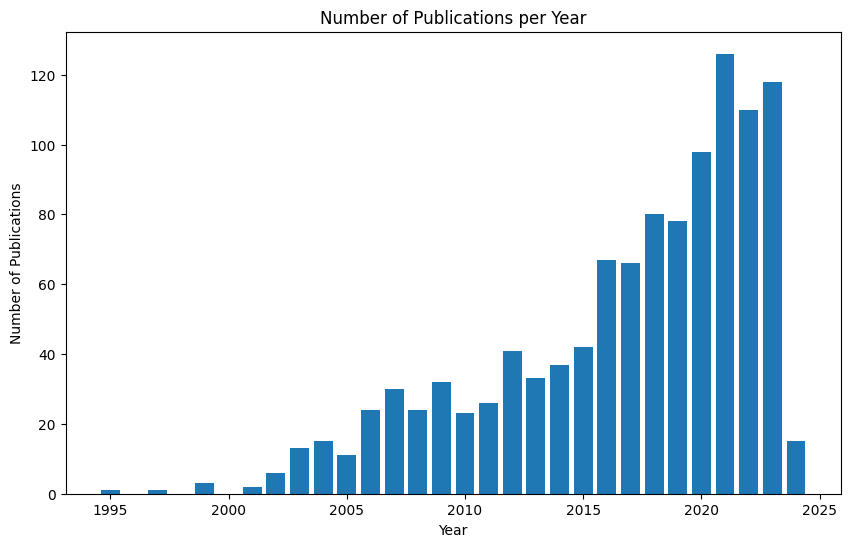

In [58]:
# Convertir la colonne 'Publication_Date' en format de date valide
df = df.withColumn("Publication_Date", to_date(col("Publication_Date"), "MM/dd/yyyy"))

# Filtrer les lignes avec des dates non valides
df = df.filter(col("Publication_Date").isNotNull())

# Extraire l'année de la date de publication
df = df.withColumn("Publication_Year", year(col("Publication_Date")))

# Filtrer les lignes avec des années non valides
df = df.filter(col("Publication_Year").isNotNull())

# Compter le nombre de publications par année
publications_per_year = df.groupBy("Publication_Year").count().orderBy("Publication_Year")

# Afficher les résultats
publications_per_year.show()

# Convertir le DataFrame PySpark en pandas pour la visualisation
publications_per_year_pd = publications_per_year.toPandas()

# Représentation graphique des publications par année
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(publications_per_year_pd['Publication_Year'], publications_per_year_pd['count'])
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Number of Publications per Year')
plt.show()

# Analyse des tendances **temporelles**

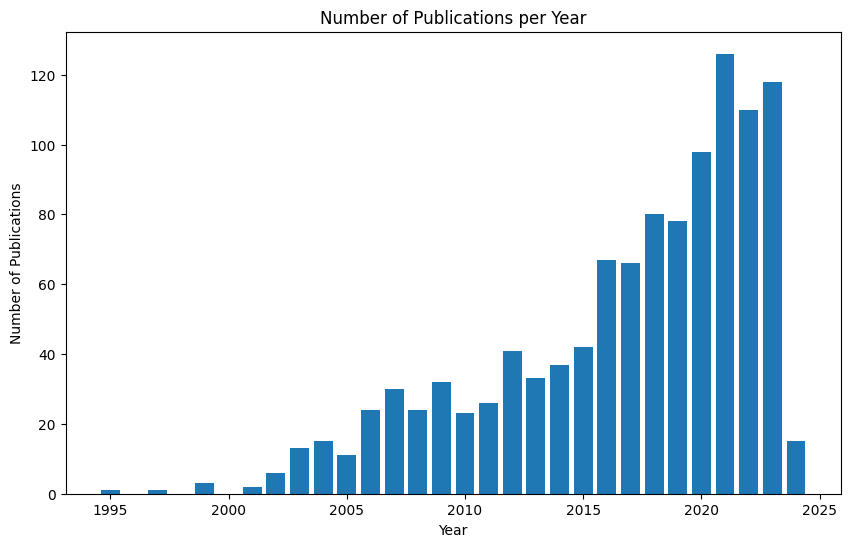

In [23]:
# Importer la bibliothèque Matplotlib
import matplotlib.pyplot as plt

# Collecter les données à tracer
years = publications_per_year.select("Publication_Year").rdd.flatMap(lambda x: x).collect()
counts = publications_per_year.select("count").rdd.flatMap(lambda x: x).collect()

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.bar(years, counts)
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.title('Number of Publications per Year')
plt.show()


# Analyse des domaines **techniques**

In [24]:
# Analyse des mots clés les plus fréquents
from pyspark.sql.functions import explode, split

keywords_count = df.withColumn("Keyword", explode(split(col("Tags"), "\\|"))) \
    .groupBy("Keyword").count().orderBy(col("count").desc())

# Afficher les résultats
keywords_count.show()


+--------------------+-----+
|             Keyword|count|
+--------------------+-----+
|['Bioinformatics'...|    5|
|['Wearable Electr...|    4|
|['Telemedicine', ...|    4|
|['Networked Healt...|    4|
|['FLAP gene', ' l...|    4|
|['Disease-Related...|    3|
|['Cost Modeling',...|    3|
|['Medicine Dispen...|    3|
|['Virtual Reality...|    3|
|['Network Transac...|    3|
|['Neurosurgical',...|    3|
|['NanoTabs', ' Tr...|    3|
|['Rejuvenation', ...|    3|
|['PRCs', ' Regene...|    3|
|['Predictive Work...|    3|
|['GENSET', ' Poly...|    3|
|['Medical Imaging...|    3|
|['Wearable Sensor...|    3|
|['Pluripotent Cel...|    3|
|['Remote Starting...|    2|
+--------------------+-----+
only showing top 20 rows





# Analyse des déposants et des **inventeurs**


In [25]:
# Analyse des déposants les plus fréquents
applicants_count = df.groupBy("Applicants").count().orderBy(col("count").desc())

# Afficher les résultats
applicants_count.show()

# Analyse des inventeurs les plus fréquents
inventors_count = df.groupBy("Inventors").count().orderBy(col("count").desc())

# Afficher les résultats
inventors_count.show()


+--------------------+-----+
|          Applicants|count|
+--------------------+-----+
|Steven Mason, Dan...|   16|
|        Steven Mason|   12|
|Anthony Michael F...|   12|
|     Kenneth Neumann|   10|
|James Proud, Brya...|    8|
|Benedict Ow, Rich...|    7|
|   Bao Tran, Ha Tran|    4|
|Prithvi Krishnan ...|    4|
|XIANGTAN MEDICINE...|    4|
|            Bao Tran|    4|
| Vladimir Shusterman|    3|
|   David H. Williams|    3|
|SHENZHEN CENTER F...|    3|
|Michael Bissonnet...|    3|
|Lotfi A. Zadeh, S...|    3|
|JIANGXI UNIVERSIT...|    3|
|       SungDuck Chun|    3|
|David H. Williams...|    3|
|   James Paul Smurro|    3|
|GOVERNMENT OF THE...|    3|
+--------------------+-----+
only showing top 20 rows

+--------------------+-----+
|           Inventors|count|
+--------------------+-----+
|    ['DONG YINGJIE']|    6|
|[['Brown, Stephen...|    5|
|    ['Dong Yingjie']|    5|
|[['Gardner, Steve...|    5|
|[['Lee, Francis (...|    4|
|[['Eberting, Cher...|    4|
|[['Sanchez, Matt

# Analyse de la répartition **géographique**

In [26]:
# Analyse de la répartition géographique des déposants
countries_count = df.groupBy("Pays").count().orderBy(col("count").desc())

# Afficher les résultats
countries_count.show()


+------------+-----+
|        Pays|count|
+------------+-----+
|      Suisse|  127|
|   Allemagne|  119|
|      France|  118|
|       Chine|  118|
|       Suède|  117|
| Royaume-Uni|  115|
|Corée du Sud|  110|
|  États-Unis|  109|
|       Japon|   98|
|      Canada|   91|
+------------+-----+



# Analyse de la similarité des **brevets**

In [27]:
import nltk
import os

# Télécharger les ressources NLTK
nltk.download('stopwords')

# Obtenez le chemin absolu du fichier zip des stopwords
stopwords_path = nltk.data.find('corpora/stopwords.zip')

# Déterminez le chemin de destination sur chaque nœud Spark
destination_path = os.path.join("/tmp", "stopwords.zip")

# Copiez le fichier zip des stopwords sur chaque nœud Spark
os.system(f"cp {stopwords_path} {destination_path}")

# Ajoutez le fichier zip des stopwords à chaque nœud Spark
spark.sparkContext.addFile(destination_path)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# Définition de la fonction de similarité
def calculate_similarity(text1, text2):
    # Convertir les textes en minuscules et supprimer les caractères spéciaux
    text1 = text1.lower().strip()
    text2 = text2.lower().strip()

    # Calculer la similarité Jaccard entre les deux textes
    tokens1 = set(text1.split())
    tokens2 = set(text2.split())
    intersection = len(tokens1.intersection(tokens2))
    union = len(tokens1.union(tokens2))
    similarity = intersection / union if union != 0 else 0

    return similarity

# Créer une fonction UDF
calculate_similarity_udf = udf(calculate_similarity, DoubleType())

# Appliquer la fonction UDF sur le DataFrame
df = df.withColumn("Similarity", calculate_similarity_udf(df["Abstract"], df["Abstract"]))


In [29]:
# Appliquer la fonction UDF sur le DataFrame
df = df.withColumn("Similarity", calculate_similarity_udf(df["Abstract"], df["Abstract"]))

# Afficher le DataFrame avec la colonne de similarité ajoutée
df.show()


+---+---+------------------+--------------------+--------------------+-------------------------+------------------+----------------+--------------------+---------+--------------------+-----------+---------------------------------+----------------+----------+
|_c0| id|Application Number|               Title|            Abstract|               Applicants|         Inventors|Publication_Date|            PDF_Link|Ressource|                Tags|       Pays|                         assignee|Publication_Year|Similarity|
+---+---+------------------+--------------------+--------------------+-------------------------+------------------+----------------+--------------------+---------+--------------------+-----------+---------------------------------+----------------+----------+
|  0|  1|         A61B 5/00|DIGITAL TRADITION...|The invention dis...|                 CHEN NAN|      ['CHEN NAN']|      2016-01-07|https://patentsco...|     WIPO|['Digital Traditi...|      Suède|              Active Medica

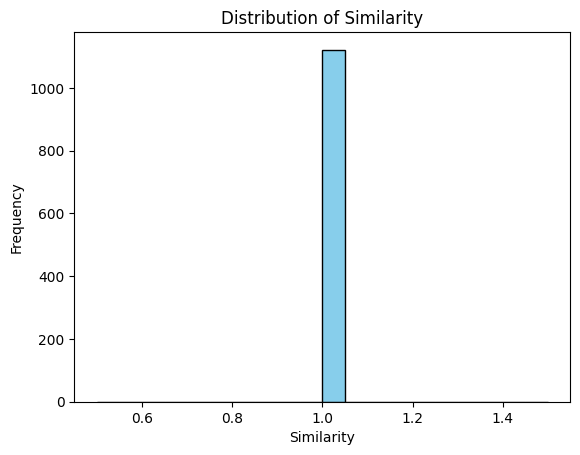

In [30]:
import matplotlib.pyplot as plt

# Collecter les similarités à afficher dans l'histogramme
similarities = df.select("Similarity").rdd.flatMap(lambda x: x).collect()

# Créer un histogramme des similarités
plt.hist(similarities, bins=20, color='skyblue', edgecolor='black')

# Ajouter des étiquettes et un titre
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity')

# Afficher l'histogramme
plt.show()


# Nombre de brevets par **année**

In [31]:
from pyspark.sql.functions import year

# Grouper par année et compter le nombre de brevets
patents_per_year = df.groupBy(year("Publication_Date").alias("Publication_Year")).count()

# Afficher les résultats
patents_per_year.show()


+----------------+-----+
|Publication_Year|count|
+----------------+-----+
|            2003|   13|
|            2007|   30|
|            2018|   80|
|            2015|   42|
|            2023|  118|
|            2006|   24|
|            2022|  110|
|            2013|   33|
|            1997|    1|
|            2014|   37|
|            2019|   78|
|            2004|   15|
|            2020|   98|
|            2012|   41|
|            2009|   32|
|            2016|   67|
|            1995|    1|
|            2001|    2|
|            2024|   15|
|            2005|   11|
+----------------+-----+
only showing top 20 rows



# Les principaux déposants (applicants)

In [32]:
# Grouper par déposants et compter le nombre de brevets par déposant
applicants_counts = df.groupBy("Applicants").count().orderBy("count", ascending=False)

# Afficher les résultats
applicants_counts.show()


+--------------------+-----+
|          Applicants|count|
+--------------------+-----+
|Steven Mason, Dan...|   16|
|        Steven Mason|   12|
|Anthony Michael F...|   12|
|     Kenneth Neumann|   10|
|James Proud, Brya...|    8|
|Benedict Ow, Rich...|    7|
|   Bao Tran, Ha Tran|    4|
|Prithvi Krishnan ...|    4|
|XIANGTAN MEDICINE...|    4|
|            Bao Tran|    4|
| Vladimir Shusterman|    3|
|   David H. Williams|    3|
|SHENZHEN CENTER F...|    3|
|Michael Bissonnet...|    3|
|Lotfi A. Zadeh, S...|    3|
|JIANGXI UNIVERSIT...|    3|
|       SungDuck Chun|    3|
|David H. Williams...|    3|
|   James Paul Smurro|    3|
|GOVERNMENT OF THE...|    3|
+--------------------+-----+
only showing top 20 rows



# Les applicants qui collaborent ensemple le plus **texte en gras**

In [33]:
from pyspark.sql.functions import split, explode

# Convertir la colonne "Applicants" en une liste
df_with_lists = df.withColumn("ApplicantsList", split(df["Applicants"], ", "))

# Explode les listes d'applicants pour avoir une ligne par applicant
df_exploded = df_with_lists.withColumn("Applicant", explode(df_with_lists["ApplicantsList"]))

# Grouper par paire d'applicants et compter le nombre de brevets par paire
applicant_pairs_counts = df_exploded.alias("df1").join(
    df_exploded.alias("df2"),
    df_exploded["id"] != df_exploded["id"]
).selectExpr(
    "df1.Applicant as Applicant1",
    "df2.Applicant as Applicant2"
).groupBy("Applicant1", "Applicant2").count().orderBy("count", ascending=False)

# Afficher les résultats
applicant_pairs_counts.show()


+---------------+---------------+-----+
|     Applicant1|     Applicant2|count|
+---------------+---------------+-----+
|           LTD.|           LTD.| 2162|
|           LTD.|   Steven Mason| 1880|
|   Steven Mason|           LTD.| 1880|
|   Steven Mason|   Steven Mason| 1560|
|Jonathan Greene|           LTD.|  940|
| Daniel Posnack|           LTD.|  940|
|S. Adam Hacking|           LTD.|  940|
|           LTD.| Daniel Posnack|  940|
|     Wendy Para|           LTD.|  940|
|      Peter Arn|           LTD.|  940|
|           LTD.|Jonathan Greene|  940|
|           LTD.|      Peter Arn|  940|
|           LTD.|S. Adam Hacking|  940|
|           LTD.|     Wendy Para|  940|
| Joseph GUANERI|           LTD.|  893|
|           LTD.| Joseph GUANERI|  893|
|Micheal Mueller|           LTD.|  846|
|           LTD.|Micheal Mueller|  846|
| Daniel Posnack|   Steven Mason|  780|
|   Steven Mason| Daniel Posnack|  780|
+---------------+---------------+-----+
only showing top 20 rows



In [34]:
from pyspark.ml.feature import CountVectorizer, VectorAssembler
from pyspark.sql.functions import split

df = df.withColumn("TagsArray", split(col("Tags"), ",\s*"))
count_vectorizer = CountVectorizer(inputCol="TagsArray", outputCol="tag_features")
cv_model = count_vectorizer.fit(df)
df_vectorized = cv_model.transform(df)
df_vectorized.select("TagsArray", "tag_features").show()
df_assembled = df_vectorized.select("tag_features")
df_assembled.show()

+--------------------+--------------------+
|           TagsArray|        tag_features|
+--------------------+--------------------+
|[['Digital Tradit...|(3106,[815,1410,2...|
|[['u-Health', ' I...|(3106,[5,45,156,1...|
|[['AI', ' Persona...|(3106,[3,1409,155...|
|[['Medical Health...|(3106,[11,84,1345...|
|[['Health Vigor B...|(3106,[934,1358,1...|
|[['AI Medical All...|(3106,[1707,1802,...|
|[['AI', ' Chinese...|(3106,[3,44,71,10...|
|[['AI', ' Smart T...|(3106,[3,70,1087,...|
|[['User Medicine ...|(3106,[815,1124,1...|
|[['Utility Model'...|(3106,[6,2102,277...|
|[['AI', ' Chinese...|(3106,[3,36,71,95...|
|[['Physical Healt...|(3106,[359,1275,2...|
|[['AI Service', '...|(3106,[118,235,18...|
|[['AI', ' IOT', '...|(3106,[0,3,36,54,...|
|[['AI', ' Intelli...|(3106,[3,784,995,...|
|[['AI', ' Three-u...|(3106,[3,1168,156...|
|[['AI Medical Fam...|(3106,[1264,1439,...|
|[['Intelligent AI...|(3106,[118,2686,2...|
|[['AI Service', '...|(3106,[118,235,27...|
|[['5-hydroxytrypt...|(3106,[891

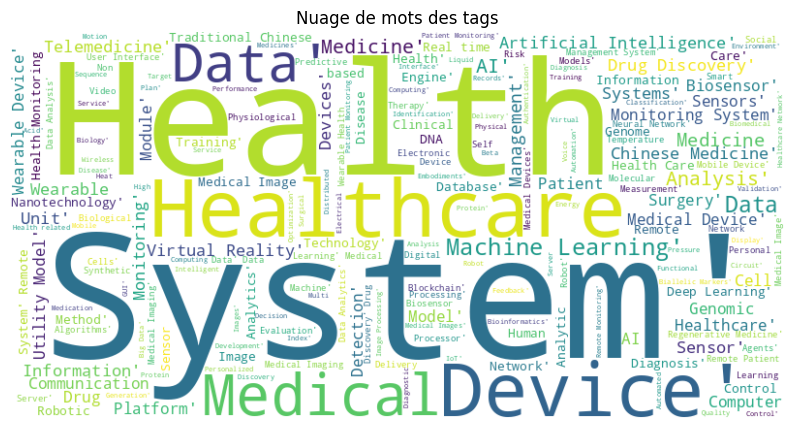

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer tous les tags dans une seule chaîne de caractères
all_tags = ' '.join(df.select("Tags").rdd.flatMap(lambda x: x).collect())

# Créer un nuage de mots avec les tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des tags')
plt.show()

## les top applicants qui réalisent plusieurs **brevets**

In [36]:
from pyspark.sql.functions import count

# Grouper par applicant et compter le nombre de brevets pour chaque applicant
top_applicants = df.groupBy("Applicants").agg(count("Applicants").alias("Total_Brevets"))

# Trier les top applicants par ordre décroissant du nombre de brevets
top_applicants = top_applicants.orderBy("Total_Brevets", ascending=False)

# Afficher les top applicants
top_applicants.show()


+--------------------+-------------+
|          Applicants|Total_Brevets|
+--------------------+-------------+
|Steven Mason, Dan...|           16|
|        Steven Mason|           12|
|Anthony Michael F...|           12|
|     Kenneth Neumann|           10|
|James Proud, Brya...|            8|
|Benedict Ow, Rich...|            7|
|   Bao Tran, Ha Tran|            4|
|Prithvi Krishnan ...|            4|
|XIANGTAN MEDICINE...|            4|
|            Bao Tran|            4|
| Vladimir Shusterman|            3|
|   David H. Williams|            3|
|SHENZHEN CENTER F...|            3|
|Michael Bissonnet...|            3|
|Lotfi A. Zadeh, S...|            3|
|JIANGXI UNIVERSIT...|            3|
|       SungDuck Chun|            3|
|David H. Williams...|            3|
|   James Paul Smurro|            3|
|GOVERNMENT OF THE...|            3|
+--------------------+-------------+
only showing top 20 rows



# la répartition des brevets par **année**

In [37]:
from pyspark.sql.functions import col

# Top des assignees avec le plus grand nombre de brevets
top_assignees = df.groupBy("assignee").count().orderBy(col("count").desc())
top_assignees.show()

# Répartition des brevets par assignee
total_patents = df.count()
patents_by_assignee = df.groupBy("assignee").count()
patents_by_assignee = patents_by_assignee.withColumn("patents_percentage", col("count") / total_patents * 100)
patents_by_assignee.show()

# Tendances de la publication de brevets pour les principaux assignees au fil du temps
top_assignees_list = top_assignees.select("assignee").limit(5).collect()
top_assignees_list = [row.assignee for row in top_assignees_list]

patents_by_year_and_assignee = df.filter(df.assignee.isin(top_assignees_list)) \
    .groupBy("assignee", year("Publication_Date").alias("Publication_Year")) \
    .count().orderBy("assignee", "Publication_Year")

patents_by_year_and_assignee.show()


+--------------------+-----+
|            assignee|count|
+--------------------+-----+
|Rom Technologies,...|   39|
|International Bus...|   18|
| Lg Electronics Inc.|   13|
|   Tempus Labs, Inc.|   11|
|General Electric ...|   11|
|          Hello Inc.|    9|
|          Google Llc|    8|
|   Duvon Corporation|    7|
|Parkland Center F...|    6|
|GE Precision Heal...|    6|
|            Bao Tran|    6|
|President And Fel...|    5|
|Clarify Health So...|    5|
|         Google Inc.|    5|
|       Newton Howard|    5|
|Accenture Global ...|    4|
|        Hc1.Com Inc.|    4|
|     Medtronic, Inc.|    4|
|Kpn Innovations, ...|    4|
|   엘지전자 주식회사|    4|
+--------------------+-----+
only showing top 20 rows

+----------------------------------+-----+-------------------+
|                          assignee|count| patents_percentage|
+----------------------------------+-----+-------------------+
|               Harrison Ai Pty Ltd|    1|0.08912655971479501|
|                 주식회사 모노라마|    1|

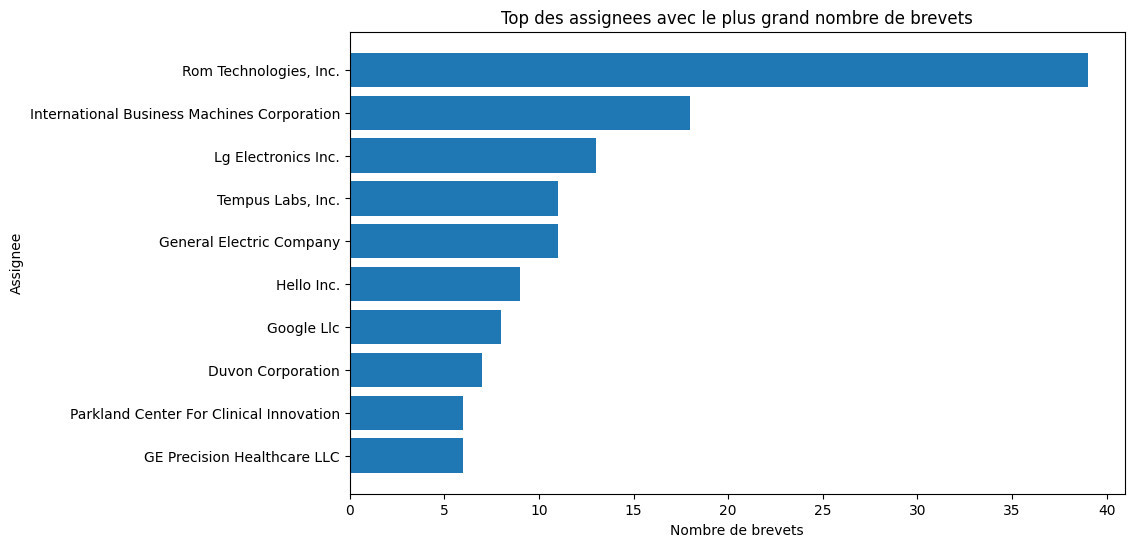

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

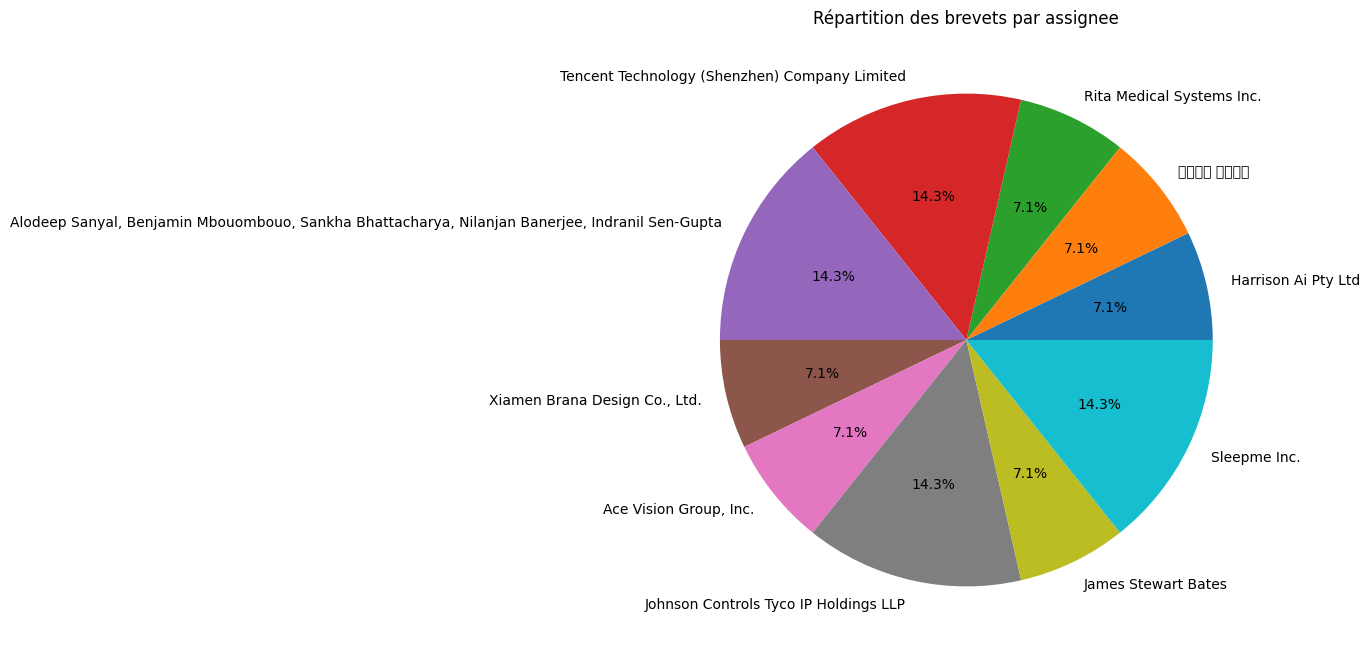

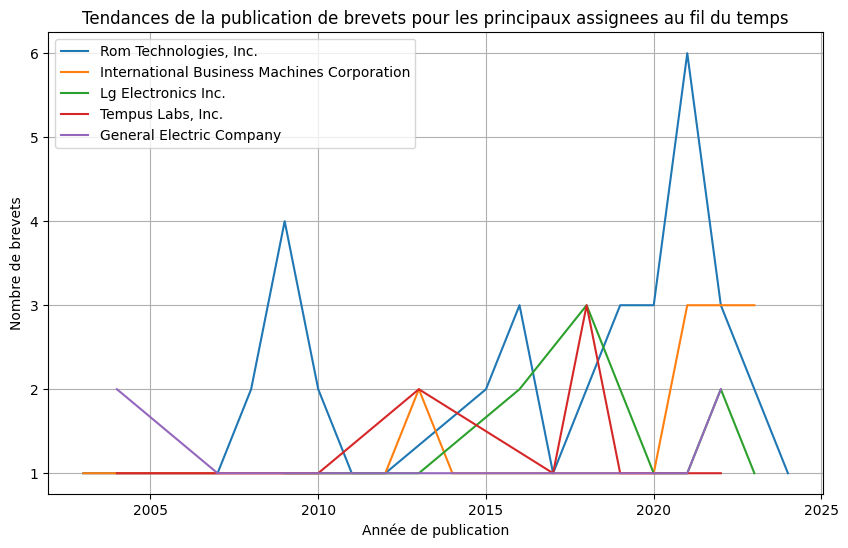

In [38]:
import matplotlib.pyplot as plt

# Top des assignees avec le plus grand nombre de brevets
top_assignees_pd = top_assignees.limit(10).toPandas()
plt.figure(figsize=(10, 6))
plt.barh(top_assignees_pd["assignee"], top_assignees_pd["count"])
plt.xlabel("Nombre de brevets")
plt.ylabel("Assignee")
plt.title("Top des assignees avec le plus grand nombre de brevets")
plt.gca().invert_yaxis()
plt.show()

# Répartition des brevets par assignee
patents_by_assignee_pd = patents_by_assignee.limit(10).toPandas()
plt.figure(figsize=(8, 8))
plt.pie(patents_by_assignee_pd["patents_percentage"], labels=patents_by_assignee_pd["assignee"], autopct='%1.1f%%')
plt.title("Répartition des brevets par assignee")
plt.show()

# Tendances de la publication de brevets pour les principaux assignees au fil du temps
patents_by_year_and_assignee_pd = patents_by_year_and_assignee.toPandas()
plt.figure(figsize=(10, 6))
for assignee in top_assignees_list:
    assignee_data = patents_by_year_and_assignee_pd[patents_by_year_and_assignee_pd["assignee"] == assignee]
    plt.plot(assignee_data["Publication_Year"], assignee_data["count"], label=assignee)
plt.xlabel("Année de publication")
plt.ylabel("Nombre de brevets")
plt.title("Tendances de la publication de brevets pour les principaux assignees au fil du temps")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, IDF

# Tokenisation des tags
tokenizer = Tokenizer(inputCol="Tags", outputCol="words")
df_tokenized = tokenizer.transform(df)

# Suppression des mots vides
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
df_filtered = remover.transform(df_tokenized)

# Calcul de la fréquence des mots
cv = CountVectorizer(inputCol="filtered_words", outputCol="raw_features")
cv_model = cv.fit(df_filtered)
df_cv = cv_model.transform(df_filtered)

# Calcul de l'importance des mots avec TF-IDF
idf = IDF(inputCol="raw_features", outputCol="features")
idf_model = idf.fit(df_cv)
df_tfidf = idf_model.transform(df_cv)

# Récupération des mots-clés/sujets les plus importants
vocab = cv_model.vocabulary
idf_scores = idf_model.idf.toArray()

# Création d'un dictionnaire avec les mots-clés/sujets et leurs scores TF-IDF
keywords_tfidf = {vocab[i]: idf_scores[i] for i in range(len(vocab))}

# Affichage des 10 mots-clés/sujets avec les scores TF-IDF les plus élevés
top_keywords_tfidf = sorted(keywords_tfidf.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 mots-clés/sujets avec les scores TF-IDF les plus élevés :")
for keyword, score in top_keywords_tfidf:
    print(keyword, ":", score)


Top 10 mots-clés/sujets avec les scores TF-IDF les plus élevés :
grant : 6.3306117741784975
examination : 6.3306117741784975
errors', : 6.3306117741784975
media : 6.3306117741784975
bottle : 6.3306117741784975
ozone : 6.3306117741784975
regeneration', : 6.3306117741784975
film', : 6.3306117741784975
children', : 6.3306117741784975
tea', : 6.3306117741784975


In [59]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, monotonically_increasing_id, col, year, month, dayofmonth, when
from pyspark.sql.functions import monotonically_increasing_id

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Construction des tables de dimension et de fait") \
    .getOrCreate()

# Load CSV file
df = spark.read.csv("/content/data.csv", header=True)

# Convert string to date object
df = df.withColumn("Publication_Date", to_date("Publication_Date", "MM/dd/yyyy"))
# Filtrer les lignes avec des dates non valides
df = df.filter(col("Publication_Date").isNotNull())
# Create other dimension tables
dim_tags = df.select("Tags").distinct().withColumn("Tag_ID", monotonically_increasing_id())
dim_inventors = df.select("Inventors").distinct().withColumnRenamed("Inventors", "Inventor_Name") \
    .withColumn("Inventor_ID", monotonically_increasing_id())
dim_applicants = df.select("Applicants", "Pays").distinct() \
    .withColumnRenamed("Applicants", "Applicant_Name") \
    .withColumn("Applicant_ID", monotonically_increasing_id())
# Modification dans dim_ressources
dim_ressources = df.select("Ressource", "id").distinct().withColumnRenamed("Ressource", "Ressource_Name") \
    .withColumn("Ressource_ID", monotonically_increasing_id())

# Création de la dimension Temps
temps_dim = df.select(
    year("Publication_Date").alias("Annee"),
    month("Publication_Date").alias("Mois"),
    dayofmonth("Publication_Date").alias("Jour"),
    df["id"]
).distinct()
temps_dim = temps_dim.withColumn("temp_id", monotonically_increasing_id())

# Add the Trimestre column based on the month
temps_dim = temps_dim.withColumn(
    "Trimestre",
    when((temps_dim["Mois"] >= 1) & (temps_dim["Mois"] <= 3), 1)
    .when((temps_dim["Mois"] >= 4) & (temps_dim["Mois"] <= 6), 2)
    .when((temps_dim["Mois"] >= 7) & (temps_dim["Mois"] <= 9), 3)
    .when((temps_dim["Mois"] >= 10) & (temps_dim["Mois"] <= 12), 4)
)

# Save dimension tables
dim_tags.write.mode("overwrite").csv("/content/dim_tags_csv", header=True)
dim_inventors.write.mode("overwrite").csv("/content/dim_inventors_csv", header=True)
dim_applicants.write.mode("overwrite").csv("/content/dim_applicants_csv", header=True)
# Modification dans l'écriture de dim_ressources
dim_ressources.write.mode("overwrite").csv("/content/dim_ressources_csv", header=True)
temps_dim.write.mode("overwrite").csv("/content/temps_dim_csv", header=True)

# Define schemas for dimensions
from pyspark.sql.types import StructType, StructField, StringType, LongType, IntegerType

tags_schema = StructType([
    StructField("Tags", StringType(), True),
    StructField("Tag_ID", LongType(), True)
])

inventors_schema = StructType([
    StructField("Inventor_Name", StringType(), True),
    StructField("Inventor_ID", LongType(), True)
])

applicants_schema = StructType([
    StructField("Applicant_Name", StringType(), True),
    StructField("Pays", StringType(), True),
    StructField("Applicant_ID", LongType(), True)
])

ressources_schema = StructType([
    StructField("Ressource_Name", StringType(), True),
    StructField("Ressource_ID", LongType(), True)
])

temps_schema = StructType([
    StructField("Annee", IntegerType(), True),
    StructField("Mois", IntegerType(), True),
    StructField("Jour", IntegerType(), True),
    StructField("id", StringType(), True),
    StructField("temp_id", LongType(), True),
    StructField("Trimestre", IntegerType(), True)
])

# Load the dimension tables from the saved CSVs with schemas
dim_tags = spark.read.schema(tags_schema).csv("/content/dim_tags_csv", header=True)
dim_inventors = spark.read.schema(inventors_schema).csv("/content/dim_inventors_csv", header=True)
dim_applicants = spark.read.schema(applicants_schema).csv("/content/dim_applicants_csv", header=True)
dim_ressources = spark.read.schema(ressources_schema).csv("/content/dim_ressources_csv", header=True)
temps_dim = spark.read.schema(temps_schema).csv("/content/temps_dim_csv", header=True)

from pyspark.sql.functions import rand

# Perform join and create fact table
fact_brevet = df.alias("df") \
    .join(dim_tags.alias("tags"), col("df.Tags") == col("tags.Tags"), "left") \
    .join(dim_inventors.alias("inventors"), col("df.Inventors") == col("inventors.Inventor_Name"), "left") \
    .join(dim_applicants.alias("applicants"), col("df.Applicants") == col("applicants.Applicant_Name"), "left") \
    .join(dim_ressources.alias("ressources"), col("df.Ressource") == col("ressources.Ressource_Name"), "left") \
    .join(temps_dim.alias("temps_dim"), col("df.id") == col("temps_dim.id"), "left") \
    .select(
        col("df.Title"),
        col("df.Abstract"),
        col("df.PDF_Link"),
        col("temps_dim.temp_id").alias("Temps_ID"),
        col("applicants.Applicant_ID"),
        col("inventors.Inventor_ID"),
        col("tags.Tag_ID"),
        col("ressources.Ressource_ID")
    )

# Add a sequential ID column
fact_brevet = fact_brevet.withColumn("Fact_ID", monotonically_increasing_id())

# Save fact table
fact_brevet.write.mode("overwrite").csv("/content/fact_brevet_csv")


In [62]:
fact_brevet.show()

+---------+--------------------+--------------------+--------------------+--------+------------+-----------+------+------------+-------+
|Patent_ID|               Title|            Abstract|            PDF_Link|Temps_ID|Applicant_ID|Inventor_ID|Tag_ID|Ressource_ID|Fact_ID|
+---------+--------------------+--------------------+--------------------+--------+------------+-----------+------+------------+-------+
|        1|DIGITAL TRADITION...|The invention dis...|https://patentsco...|     100|         891|        412|   745|           0|      0|
|        2|SYSTEM AND METHOD...|Disclosed are a s...|https://patentsco...|     549|         241|        791|   694|           0|      1|
|        3|ARTIFICIAL INTELL...|The present inven...|https://patentsco...|     454|         709|        704|   123|           0|      2|
|        4|HEALTH REPORT GEN...|The invention rel...|https://patentsco...|     676|         614|        153|   241|           0|      3|
|        5|    HEALTH VIGOR BAG|The inven

In [63]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, monotonically_increasing_id, col, year, month, dayofmonth, when
from pyspark.sql.functions import monotonically_increasing_id

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Construction des tables de dimension et de fait") \
    .getOrCreate()

# Load CSV file
df = spark.read.csv("/content/data.csv", header=True)

# Convert string to date object
df = df.withColumn("Publication_Date", to_date("Publication_Date", "MM/dd/yyyy"))
# Filtrer les lignes avec des dates non valides
df = df.filter(col("Publication_Date").isNotNull())
df.show()

+---+---+------------------+--------------------+--------------------+-------------------------+------------------+----------------+--------------------+---------+--------------------+-----------+---------------------------------+
|_c0| id|Application Number|               Title|            Abstract|               Applicants|         Inventors|Publication_Date|            PDF_Link|Ressource|                Tags|       Pays|                         assignee|
+---+---+------------------+--------------------+--------------------+-------------------------+------------------+----------------+--------------------+---------+--------------------+-----------+---------------------------------+
|  0|  1|         A61B 5/00|DIGITAL TRADITION...|The invention dis...|                 CHEN NAN|      ['CHEN NAN']|      2016-01-07|https://patentsco...|     WIPO|['Digital Traditi...|      Suède|              Active Medical B.V.|
|  1|  2|        G16C 10/00|SYSTEM AND METHOD...|Disclosed are a s...|    인하

In [64]:
# Filter rows where 'Publication_Date' is null
null_publication_date_df = df.filter(col("Publication_Date").isNull())

# Show the filtered DataFrame
print("Rows where 'Publication_Date' is null:")
null_publication_date_df.show()

Rows where 'Publication_Date' is null:
+---+---+------------------+-----+--------+----------+---------+----------------+--------+---------+----+----+--------+
|_c0| id|Application Number|Title|Abstract|Applicants|Inventors|Publication_Date|PDF_Link|Ressource|Tags|Pays|assignee|
+---+---+------------------+-----+--------+----------+---------+----------------+--------+---------+----+----+--------+
+---+---+------------------+-----+--------+----------+---------+----------------+--------+---------+----+----+--------+



In [65]:

# Create other dimension tables
dim_tags = df.select("Tags").distinct().withColumn("Tag_ID", monotonically_increasing_id())
dim_inventors = df.select("Inventors").distinct().withColumnRenamed("Inventors", "Inventor_Name") \
    .withColumn("Inventor_ID", monotonically_increasing_id())
dim_applicants = df.select("Applicants", "Pays").distinct() \
    .withColumnRenamed("Applicants", "Applicant_Name") \
    .withColumn("Applicant_ID", monotonically_increasing_id())
dim_ressources = df.select("Ressource").distinct().withColumnRenamed("Ressource", "Ressource_Name") \
    .withColumn("Ressource_ID", monotonically_increasing_id())

# Création de la dimension Temps
temps_dim = df.select(
    year("Publication_Date").alias("Annee"),
    month("Publication_Date").alias("Mois"),
    dayofmonth("Publication_Date").alias("Jour"),
    df["id"]
).distinct()
temps_dim = temps_dim.withColumn("temp_id", monotonically_increasing_id())

# Add the Trimestre column based on the month
temps_dim = temps_dim.withColumn(
    "Trimestre",
    when((temps_dim["Mois"] >= 1) & (temps_dim["Mois"] <= 3), 1)
    .when((temps_dim["Mois"] >= 4) & (temps_dim["Mois"] <= 6), 2)
    .when((temps_dim["Mois"] >= 7) & (temps_dim["Mois"] <= 9), 3)
    .when((temps_dim["Mois"] >= 10) & (temps_dim["Mois"] <= 12), 4)
)

# Save dimension tables
dim_tags.write.mode("overwrite").csv("/content/dim_tags_csv", header=True)
dim_inventors.write.mode("overwrite").csv("/content/dim_inventors_csv", header=True)
dim_applicants.write.mode("overwrite").csv("/content/dim_applicants_csv", header=True)
dim_ressources.write.mode("overwrite").csv("/content/dim_ressources_csv", header=True)
temps_dim.write.mode("overwrite").csv("/content/temps_dim_csv", header=True)

# Define schemas for dimensions
from pyspark.sql.types import StructType, StructField, StringType, LongType, IntegerType

tags_schema = StructType([
    StructField("Tags", StringType(), True),
    StructField("Tag_ID", LongType(), True)
])

inventors_schema = StructType([
    StructField("Inventor_Name", StringType(), True),
    StructField("Inventor_ID", LongType(), True)
])

applicants_schema = StructType([
    StructField("Applicant_Name", StringType(), True),
    StructField("Pays", StringType(), True),
    StructField("Applicant_ID", LongType(), True)
])

ressources_schema = StructType([
    StructField("Ressource_Name", StringType(), True),
    StructField("Ressource_ID", LongType(), True)
])

temps_schema = StructType([
    StructField("Annee", IntegerType(), True),
    StructField("Mois", IntegerType(), True),
    StructField("Jour", IntegerType(), True),
    StructField("id", StringType(), True),
    StructField("temp_id", LongType(), True),
    StructField("Trimestre", IntegerType(), True)
])

# Load the dimension tables from the saved CSVs with schemas
dim_tags = spark.read.schema(tags_schema).csv("/content/dim_tags_csv", header=True)
dim_inventors = spark.read.schema(inventors_schema).csv("/content/dim_inventors_csv", header=True)
dim_applicants = spark.read.schema(applicants_schema).csv("/content/dim_applicants_csv", header=True)
dim_ressources = spark.read.schema(ressources_schema).csv("/content/dim_ressources_csv", header=True)
temps_dim = spark.read.schema(temps_schema).csv("/content/temps_dim_csv", header=True)

from pyspark.sql.functions import rand

# Perform join and create fact table
fact_brevet = df.alias("df") \
    .join(dim_tags.alias("tags"), col("df.Tags") == col("tags.Tags"), "left") \
    .join(dim_inventors.alias("inventors"), col("df.Inventors") == col("inventors.Inventor_Name"), "left") \
    .join(dim_applicants.alias("applicants"), col("df.Applicants") == col("applicants.Applicant_Name"), "left") \
    .join(dim_ressources.alias("ressources"), col("df.Ressource") == col("ressources.Ressource_Name"), "left") \
    .join(temps_dim.alias("temps_dim"), col("df.id") == col("temps_dim.id"), "left") \
    .select(
        col("df.Title"),
        col("df.Abstract"),
        col("df.PDF_Link"),
        col("temps_dim.temp_id").alias("Temps_ID"),
        col("applicants.Applicant_ID"),
        col("inventors.Inventor_ID"),
        col("tags.Tag_ID"),
        col("ressources.Ressource_ID")
    )

# Add a sequential ID column
fact_brevet = fact_brevet.withColumn("Fact_ID", monotonically_increasing_id())

# Save fact table
fact_brevet.write.mode("overwrite").csv("/content/fact_brevet_csv")


In [66]:
temps_dim.show()

+-----+----+----+----+-------+---------+
|Annee|Mois|Jour|  id|temp_id|Trimestre|
+-----+----+----+----+-------+---------+
| 2023|   9|  28| 546|      0|        3|
| 2023|   1|   3| 664|      1|        1|
| 2022|   5|  12| 757|      2|        2|
| 2020|   3|  31|1081|      3|        1|
| 2012|  12|  25|1138|      4|        4|
| 2019|   1|  22| 120|      5|        1|
| 2020|   6|  19| 147|      6|        2|
| 2014|   7|   8| 845|      7|        3|
| 2009|  10|  13|  82|      8|        4|
| 2020|   6|  19| 139|      9|        2|
| 2021|   4|  20| 162|     10|        2|
| 2011|  12|   1| 285|     11|        4|
| 2019|  12|   5| 299|     12|        4|
| 2022|   6|   9| 863|     13|        2|
| 2021|  10|   5| 952|     14|        4|
| 2017|   3|  14|1061|     15|        1|
| 2007|   5|  29|  89|     16|        2|
| 2023|   6|  27| 107|     17|        2|
| 2010|  11|  18| 549|     18|        4|
| 2017|   1|  31| 743|     19|        1|
+-----+----+----+----+-------+---------+
only showing top

In [67]:
fact_brevet.show()

+--------------------+--------------------+--------------------+--------+------------+-----------+------+------------+-------+
|               Title|            Abstract|            PDF_Link|Temps_ID|Applicant_ID|Inventor_ID|Tag_ID|Ressource_ID|Fact_ID|
+--------------------+--------------------+--------------------+--------+------------+-----------+------+------------+-------+
|DIGITAL TRADITION...|The invention dis...|https://patentsco...|    1040|         891|        412|   745|           0|      0|
|SYSTEM AND METHOD...|Disclosed are a s...|https://patentsco...|     350|         241|        791|   694|           0|      1|
|ARTIFICIAL INTELL...|The present inven...|https://patentsco...|      27|         709|        704|   123|           0|      2|
|HEALTH REPORT GEN...|The invention rel...|https://patentsco...|     180|         614|        153|   241|           0|      3|
|    HEALTH VIGOR BAG|The invention dis...|https://patentsco...|     122|         871|        729|   669|      

In [68]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, monotonically_increasing_id, col, year, month, dayofmonth, when
from pyspark.sql.functions import monotonically_increasing_id

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Construction des tables de dimension et de fait") \
    .getOrCreate()

# Load CSV file
df = spark.read.csv("/content/data.csv", header=True, inferSchema=True)

# Convert string to date object
df = df.withColumn("Publication_Date", to_date("Publication_Date", "MM/dd/yyyy"))

# Create dimension tables
dim_tags = df.select("Tags").distinct().withColumn("Tag_ID", monotonically_increasing_id())
dim_inventors = df.select("Inventors").distinct().withColumnRenamed("Inventors", "Inventor_Name") \
    .withColumn("Inventor_ID", monotonically_increasing_id())
dim_applicants = df.select("Applicants", "Pays").distinct() \
    .withColumnRenamed("Applicants", "Applicant_Name") \
    .withColumn("Applicant_ID", monotonically_increasing_id())

# Create the time dimension
temps_dim = df.select(
    year("Publication_Date").alias("Annee"),
    month("Publication_Date").alias("Mois"),
    dayofmonth("Publication_Date").alias("Jour")
).distinct()
temps_dim = temps_dim.withColumn("Temps_ID", monotonically_increasing_id())

# Add the Trimestre column based on the month
temps_dim = temps_dim.withColumn(
    "Trimestre",
    when((temps_dim["Mois"] >= 1) & (temps_dim["Mois"] <= 3), 1)
    .when((temps_dim["Mois"] >= 4) & (temps_dim["Mois"] <= 6), 2)
    .when((temps_dim["Mois"] >= 7) & (temps_dim["Mois"] <= 9), 3)
    .when((temps_dim["Mois"] >= 10) & (temps_dim["Mois"] <= 12), 4)
)

# Create the resource dimension
dim_ressource = df.select("Ressource").distinct() \
    .withColumnRenamed("Ressource", "Ressource_Name") \
    .withColumn("Ressource_ID", monotonically_increasing_id())

# Perform joins and create the fact table
fact_brevet = df.alias("df") \
    .join(dim_tags.alias("tags"), col("df.Tags") == col("tags.Tags"), "left") \
    .join(dim_inventors.alias("inventors"), col("df.Inventors") == col("inventors.Inventor_Name"), "left") \
    .join(dim_applicants.alias("applicants"), col("df.Applicants") == col("applicants.Applicant_Name"), "left") \
    .join(dim_ressource.alias("ressources"), col("df.Ressource") == col("ressources.Ressource_Name"), "left") \
    .join(temps_dim.alias("temps_dim"), (year(col("df.Publication_Date")) == col("temps_dim.Annee")) &
                                         (month(col("df.Publication_Date")) == col("temps_dim.Mois")) &
                                         (dayofmonth(col("df.Publication_Date")) == col("temps_dim.Jour")), "left") \
    .select(
        col("df.id").alias("Patent_ID"),
        col("df.Title"),
        col("df.Abstract"),
        col("df.PDF_Link"),
        col("temps_dim.Temps_ID"),
        col("applicants.Applicant_ID"),
        col("inventors.Inventor_ID"),
        col("tags.Tag_ID"),
        col("ressources.Ressource_ID")
    )




# Save dimension and fact tables
dim_tags.write.mode("overwrite").csv("/content/dim_tags_csv")
dim_inventors.write.mode("overwrite").csv("/content/dim_inventors_csv")
dim_applicants.write.mode("overwrite").csv("/content/dim_applicants_csv")
dim_ressource.write.mode("overwrite").csv("/content/dim_ressource_csv")
temps_dim.write.mode("overwrite").csv("/content/temps_dim_csv")
fact_brevet.write.mode("overwrite").csv("/content/fact_brevet_csv")


In [79]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, monotonically_increasing_id, col, year, month, dayofmonth, when

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Construction des tables de dimension et de fait") \
    .getOrCreate()

# Load CSV file
df = spark.read.csv("/content/data.csv", header=True, inferSchema=True)

# Convert string to date object
df = df.withColumn("Publication_Date", to_date("Publication_Date", "MM/dd/yyyy"))

# Filtrer les lignes avec des dates non valides
df = df.filter(col("Publication_Date").isNotNull())

# Create dimension tables
dim_tags = df.select("Tags").distinct().withColumn("Tag_ID", monotonically_increasing_id())
dim_inventors = df.select("Inventors").distinct().withColumnRenamed("Inventors", "Inventor_Name") \
    .withColumn("Inventor_ID", monotonically_increasing_id())
dim_applicants = df.select("Applicants", "Pays").distinct() \
    .withColumnRenamed("Applicants", "Applicant_Name") \
    .withColumn("Applicant_ID", monotonically_increasing_id())

# Create the time dimension
temps_dim = df.select(
    year("Publication_Date").alias("Annee"),
    month("Publication_Date").alias("Mois"),
    dayofmonth("Publication_Date").alias("Jour")
).distinct()
temps_dim = temps_dim.withColumn("Temps_ID", monotonically_increasing_id())

# Add the Trimestre column based on the month
temps_dim = temps_dim.withColumn(
    "Trimestre",
    when((temps_dim["Mois"] >= 1) & (temps_dim["Mois"] <= 3), 1)
    .when((temps_dim["Mois"] >= 4) & (temps_dim["Mois"] <= 6), 2)
    .when((temps_dim["Mois"] >= 7) & (temps_dim["Mois"] <= 9), 3)
    .when((temps_dim["Mois"] >= 10) & (temps_dim["Mois"] <= 12), 4)
)

# Create the resource dimension
dim_ressource = df.select("Ressource").distinct() \
    .withColumnRenamed("Ressource", "Ressource_Name") \
    .withColumn("Ressource_ID", monotonically_increasing_id())

# Perform joins and create the fact table
fact_brevet = df.alias("df") \
    .join(dim_tags.alias("tags"), col("df.Tags") == col("tags.Tags"), "left") \
    .join(dim_inventors.alias("inventors"), col("df.Inventors") == col("inventors.Inventor_Name"), "left") \
    .join(dim_applicants.alias("applicants"), col("df.Applicants") == col("applicants.Applicant_Name"), "left") \
    .join(dim_ressource.alias("ressources"), col("df.Ressource") == col("ressources.Ressource_Name"), "left") \
    .join(temps_dim.alias("temps_dim"), (year(col("df.Publication_Date")) == col("temps_dim.Annee")) &
                                         (month(col("df.Publication_Date")) == col("temps_dim.Mois")) &
                                         (dayofmonth(col("df.Publication_Date")) == col("temps_dim.Jour")), "left") \
    .select(
        col("df.id").alias("Patent_ID"),
        col("df.Title"),
        col("df.Abstract"),
        col("df.PDF_Link"),
        col("temps_dim.Temps_ID").alias("Temps_ID"),  # Renommer la colonne Temps_ID
        col("applicants.Applicant_ID"),
        col("inventors.Inventor_ID"),
        col("tags.Tag_ID"),
        col("ressources.Ressource_ID")
    )

# Add a sequential ID column to the fact table
fact_brevet = fact_brevet.withColumn("Fact_ID", monotonically_increasing_id())

# Save dimension and fact tables
dim_tags.write.mode("overwrite").csv("/content/dim_tags_csv")
dim_inventors.write.mode("overwrite").csv("/content/dim_inventors_csv")
dim_applicants.write.mode("overwrite").csv("/content/dim_applicants_csv")
dim_ressource.write.mode("overwrite").csv("/content/dim_ressource_csv")
temps_dim.write.mode("overwrite").csv("/content/temps_dim_csv")
fact_brevet.write.mode("overwrite").csv("/content/fact_brevet_csv")


In [80]:
# Filter rows where 'Publication_Date' is null
null_publication_date_df = df.filter(col("Publication_Date").isNull())

# Show the filtered DataFrame
print("Rows where 'Publication_Date' is null:")
null_publication_date_df.show()

Rows where 'Publication_Date' is null:
+---+---+------------------+-----+--------+----------+---------+----------------+--------+---------+----+----+--------+
|_c0| id|Application Number|Title|Abstract|Applicants|Inventors|Publication_Date|PDF_Link|Ressource|Tags|Pays|assignee|
+---+---+------------------+-----+--------+----------+---------+----------------+--------+---------+----+----+--------+
+---+---+------------------+-----+--------+----------+---------+----------------+--------+---------+----+----+--------+



In [81]:
temps_dim.show()

+-----+----+----+--------+---------+
|Annee|Mois|Jour|Temps_ID|Trimestre|
+-----+----+----+--------+---------+
| 2021|   4|   7|       0|        2|
| 2017|   4|  11|       1|        2|
| 2012|   3|  13|       2|        1|
| 2023|   5|  18|       3|        2|
| 2019|  11|  19|       4|        4|
| 2020|  11|  24|       5|        4|
| 2017|   3|  22|       6|        1|
| 2016|  10|  21|       7|        4|
| 2013|   3|  26|       8|        1|
| 2023|   1|   3|       9|        1|
| 2022|   7|   5|      10|        3|
| 2022|   3|  10|      11|        1|
| 2016|   1|  26|      12|        1|
| 2015|   7|  16|      13|        3|
| 2005|   9|   8|      14|        3|
| 2020|   7|  23|      15|        3|
| 2013|   6|  27|      16|        2|
| 2022|   2|  24|      17|        1|
| 2023|   3|  14|      18|        1|
| 2023|   6|  29|      19|        2|
+-----+----+----+--------+---------+
only showing top 20 rows



In [72]:
temps_dim.show()

+-----+----+----+--------+---------+
|Annee|Mois|Jour|Temps_ID|Trimestre|
+-----+----+----+--------+---------+
| 2021|   4|   7|       0|        2|
| 2017|   4|  11|       1|        2|
| 2012|   3|  13|       2|        1|
| 2023|   5|  18|       3|        2|
| 2019|  11|  19|       4|        4|
| 2020|  11|  24|       5|        4|
| 2017|   3|  22|       6|        1|
| 2016|  10|  21|       7|        4|
| 2013|   3|  26|       8|        1|
| 2023|   1|   3|       9|        1|
| 2022|   7|   5|      10|        3|
| 2022|   3|  10|      11|        1|
| 2016|   1|  26|      12|        1|
| 2015|   7|  16|      13|        3|
| 2005|   9|   8|      14|        3|
| 2020|   7|  23|      15|        3|
| 2013|   6|  27|      16|        2|
| 2022|   2|  24|      17|        1|
| 2023|   3|  14|      18|        1|
| 2023|   6|  29|      19|        2|
+-----+----+----+--------+---------+
only showing top 20 rows



In [100]:
dim_inventors_pd = dim_inventors.toPandas()
dim_applicants_pd = dim_applicants.toPandas()
dim_ressources_pd = dim_ressources.toPandas()
dim_temps_pd = temps_dim.toPandas()
dim_fact_brevet_pd = fact_brevet.toPandas()
dim_tags_pd = dim_tags.toPandas()

In [129]:
# Convert column names to lowercase
dim_inventors_pd.columns = dim_inventors_pd.columns.str.lower()
dim_applicants_pd.columns = dim_applicants_pd.columns.str.lower()
dim_ressources_pd.columns = dim_ressources_pd.columns.str.lower()
dim_temps_pd.columns = dim_temps_pd.columns.str.lower()
dim_fact_brevet_pd.columns = dim_fact_brevet_pd.columns.str.lower()
dim_tags_pd.columns = dim_tags_pd.columns.str.lower()

# Display DataFrame column names to verify
print("dim_inventors_pd columns:", dim_inventors_pd.columns)
print("dim_applicants_pd columns:", dim_applicants_pd.columns)
print("dim_ressources_pd columns:", dim_ressources_pd.columns)
print("dim_temps_pd columns:", dim_temps_pd.columns)
print("dim_fact_brevet_pd columns:", dim_fact_brevet_pd.columns)
print("dim_tags_pd columns:", dim_tags_pd.columns)

dim_inventors_pd columns: Index(['inventor_name', 'inventor_id'], dtype='object')
dim_applicants_pd columns: Index(['applicant_name', 'pays', 'applicant_id'], dtype='object')
dim_ressources_pd columns: Index(['ressource_name', 'ressource_id'], dtype='object')
dim_temps_pd columns: Index(['annee', 'mois', 'jour', 'temp_id', 'trimestre'], dtype='object')
dim_fact_brevet_pd columns: Index(['patent_id', 'title', 'abstract', 'pdf_link', 'temp_id', 'applicant_id',
       'inventor_id', 'tag_id', 'ressource_id', 'fact_id'],
      dtype='object')
dim_tags_pd columns: Index(['tags', 'tag_id'], dtype='object')


In [125]:
dim_tags_pd.columns = ['Tags', 'tag_id']

In [114]:

dim_fact_brevet_pd.columns = ['Patent_ID', 'Title', 'Abstract', 'PDF_Link', 'temp_id',
       'Applicant_ID', 'Inventor_ID', 'Tag_ID', 'Ressource_ID', 'Fact_ID']


In [115]:
dim_fact_brevet_pd[dim_fact_brevet_pd['temp_id'].isna()]


,Patent_ID,Title,Abstract,PDF_Link,temp_id,Applicant_ID,Inventor_ID,Tag_ID,Ressource_ID,Fact_ID


In [90]:
!pip install snowflake-connector-python


In [133]:
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

# Establish the Snowflake connection
conn = snowflake.connector.connect(
    user='OUMAMOUJIB12',
    password='Go go go123@',
    account='rdmkqul-nh23498',
    warehouse='COMPUTE_WH',
    database='BREVET',
    schema='PUBLIC'
)

create_table_sql = {
    "Tags": '''
        CREATE TABLE IF NOT EXISTS "Tags" (
            "tags" VARCHAR,
            "tag_id" NUMBER,
            "trevet_ID" NUMBER
        );
    ''',
    "Inventors": '''
        CREATE TABLE IF NOT EXISTS "Inventors" (
            "inventor_id" NUMBER,
            "inventor_name" VARCHAR,
            "brevet_id" NUMBER
        );
    ''',
    "Applicants": '''
        CREATE TABLE IF NOT EXISTS "Applicants" (
            "applicant_id" NUMBER,
            "applicant_name" VARCHAR,
            "pays" VARCHAR,
            "brevet_id" NUMBER
        );
    ''',
    "Ressources": '''
        CREATE TABLE IF NOT EXISTS "Ressources" (
            "ressource_id" NUMBER,
            "ressource_name" VARCHAR,
            "brevet_id" NUMBER
        );
    ''',
    "Temps": '''
    CREATE TABLE IF NOT EXISTS "Temps" (
        "annee" NUMBER,
        "mois" NUMBER,
        "jour" NUMBER,
        "temps_id" NUMBER,
        "trimestre" NUMBER
    );
    ''',


    "Fact_Brevet": '''
        CREATE TABLE IF NOT EXISTS "Fact_Brevet" (
            "patent_id" NUMBER,
            "title" VARCHAR,
            "abstract" VARCHAR,
            "pdf_link" VARCHAR,
            "temps_id" INT,
            "applicant_id" NUMBER,
            "inventor_id" NUMBER,
            "tag_id" NUMBER,
            "ressource_id" NUMBER,
            "fact_id" NUMBER
        );
    '''
}

for table_name, create_query in create_table_sql.items():
    # print(f"Table {table_name} - Success: {success}, Number of chunks: {nchunks}, Number of rows: {nrows}")
    # Execute table creation SQL
    conn.cursor().execute(create_query)

    # Get the corresponding DataFrame
    df = locals()[f"dim_{table_name.lower()}_pd"]

    print(df.columns)

    # Write DataFrame to Snowflake
    success, nchunks, nrows, _ = write_pandas(conn, df, table_name=table_name)


    print(f"Table '{table_name}' - Success: {success}, Number of chunks: {nchunks}, Number of rows: {nrows}")
    print()


Index(['tags', 'tag_id'], dtype='object')
Table 'Tags' - Success: True, Number of chunks: 1, Number of rows: 907

Index(['inventor_name', 'inventor_id'], dtype='object')
Table 'Inventors' - Success: True, Number of chunks: 1, Number of rows: 917

Index(['applicant_name', 'pays', 'applicant_id'], dtype='object')
Table 'Applicants' - Success: True, Number of chunks: 1, Number of rows: 1084

Index(['ressource_name', 'ressource_id'], dtype='object')
Table 'Ressources' - Success: True, Number of chunks: 1, Number of rows: 2

Index(['annee', 'mois', 'jour', 'temp_id', 'trimestre'], dtype='object')


ProgrammingError: 000904 (42000): SQL compilation error: error line 1 at position 102
invalid identifier '"temp_id"'

In [144]:
dim_temps_pd.columns = ['annee', 'mois', 'jour', 'temps_id', 'trimestre']

In [145]:
success, nchunks, nrows, _ = write_pandas(conn, dim_temps_pd , table_name="Temps")


In [139]:
dim_fact_brevet_pd.columns = ['Patent_ID', 'Title', 'Abstract', 'PDF_Link', 'Temps_ID',
       'Applicant_ID', 'Inventor_ID', 'Tag_ID', 'Ressource_ID', 'Fact_ID']